# Polarized Calculations

SK-DO contains the ability to model the Stokes vector inside the Earth's atmosphere.  Currently we assume that V=0, i.e., there is no circular polarization.  Therefore only the I, Q, U components of the Stoke's vector are calculated.  Every stokes component is fully linearized.

In [1]:
%matplotlib inline

In [2]:
import sasktran as sk
import sasktran.disco.interface as do
import numpy as np
import matplotlib.pyplot as plt

In [3]:
geometry = sk.NadirGeometry()
geometry.from_zeniths_and_azimuth_difference(80, 30, 45)

atmosphere = sk.Atmosphere()

# add our species
atmosphere['rayleigh'] = sk.Species(sk.Rayleigh(), sk.MSIS90())
atmosphere['o3'] = sk.Species(sk.O3OSIRISRes(), sk.Labow())
atmosphere['no2'] = sk.Species(sk.NO2OSIRISRes(), sk.Pratmo())
atmosphere.atmospheric_state = sk.MSIS90()

# add our surface properties
# setting to a scalar automatically sets the surface to be Lambertian
atmosphere.brdf = 0.3

In [4]:
atmosphere = sk.Atmosphere()

# add our species
atmosphere['rayleigh'] = sk.Species(sk.Rayleigh(), sk.MSIS90())
atmosphere['o3'] = sk.Species(sk.O3OSIRISRes(), sk.Labow())
atmosphere['no2'] = sk.Species(sk.NO2OSIRISRes(), sk.Pratmo())
atmosphere.atmospheric_state = sk.MSIS90()

# add our surface properties
atmosphere.brdf = sk.Kokhanovsky()

In [5]:
wavelengths = np.linspace(340,700, 361)
engine = do.EngineDO(geometry=geometry, atmosphere=atmosphere, wavelengths=wavelengths)

engine.num_stokes = 3
engine.num_streams = 4

rad = engine.calculate_radiance()
print(rad)

ERROR	:An internal runtime exception has occured. Likey due to insufficient precision. ERROR MESSAGE:LAPACKE_dgbsv had an illegal argument in sktran_do_detail::RTESolver::SolveBVP
ERROR	:An internal runtime exception has occured. Likey due to insufficient precision. ERROR MESSAGE:LAPACKE_dgbsv had an illegal argument in sktran_do_detail::RTESolver::SolveBVP
ERROR	:An internal runtime exception has occured. Likey due to insufficient precision. ERROR MESSAGE:LAPACKE_dgbsv had an illegal argument in sktran_do_detail::RTESolver::SolveBVP
ERROR	:An internal runtime exception has occured. Likey due to insufficient precision. ERROR MESSAGE:LAPACKE_dgbsv had an illegal argument in sktran_do_detail::RTESolver::SolveBVP
ERROR	:An internal runtime exception has occured. Likey due to insufficient precision. ERROR MESSAGE:LAPACKE_dgbsv had an illegal argument in sktran_do_detail::RTESolver::SolveBVP
ERROR	:An internal runtime exception has occured. Likey due to insufficient precision. ERROR MESSAGE

ERROR	:An internal runtime exception has occured. Likey due to insufficient precision. ERROR MESSAGE:LAPACKE_dgbsv had an illegal argument in sktran_do_detail::RTESolver::SolveBVP
ERROR	:An internal runtime exception has occured. Likey due to insufficient precision. ERROR MESSAGE:LAPACKE_dgbsv had an illegal argument in sktran_do_detail::RTESolver::SolveBVP
ERROR	:An internal runtime exception has occured. Likey due to insufficient precision. ERROR MESSAGE:LAPACKE_dgbsv had an illegal argument in sktran_do_detail::RTESolver::SolveBVP
ERROR	:An internal runtime exception has occured. Likey due to insufficient precision. ERROR MESSAGE:LAPACKE_dgbsv had an illegal argument in sktran_do_detail::RTESolver::SolveBVP
ERROR	:An internal runtime exception has occured. Likey due to insufficient precision. ERROR MESSAGE:LAPACKE_dgbsv had an illegal argument in sktran_do_detail::RTESolver::SolveBVP
ERROR	:An internal runtime exception has occured. Likey due to insufficient precision. ERROR MESSAGE

<xarray.Dataset>
Dimensions:                (wavelength: 361, los: 1, xyz: 3, stokes: 3)
Coordinates:
  * wavelength             (wavelength) float64 340.0 341.0 ... 699.0 700.0
  * xyz                    (xyz) <U1 'x' 'y' 'z'
  * stokes                 (stokes) <U1 'I' 'Q' 'U'
Dimensions without coordinates: los
Data variables:
    I                      (wavelength, los) float64 nan nan ... 0.04436 0.04439
    Q                      (wavelength, los) float64 0.0 0.0 ... -0.0005065
    U                      (wavelength, los) float64 0.0 0.0 ... -0.001515
    V                      (wavelength, los) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    propagation_direction  (los, xyz) float64 -0.5713 -0.6752 0.4667
    theta_direction        (los, xyz) float64 0.5143 -0.7376 -0.4376
    phi_direction          (los, xyz) float64 0.6397 -0.009977 0.7686
    mjd                    (los) float64 5.82e+04
    los_vector             (los, xyz) float64 0.5713 0.6752 -0.4667
    observer_position      (lo

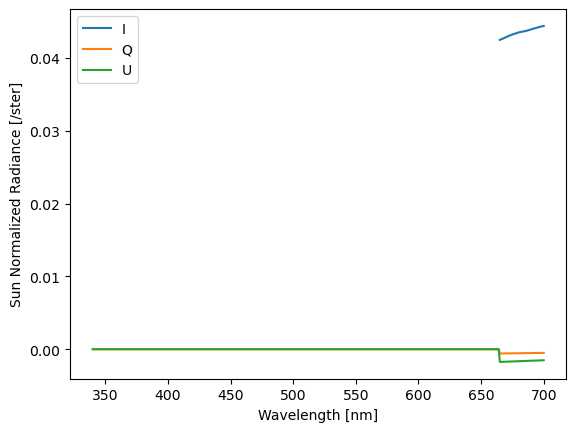

In [6]:
# Make plot
plt.figure()
plt.plot(rad['wavelength'], rad['radiance'].isel(stokes=0))
plt.plot(rad['wavelength'], rad['radiance'].isel(stokes=1))
plt.plot(rad['wavelength'], rad['radiance'].isel(stokes=2))


plt.xlabel('Wavelength [nm]')
plt.ylabel('Sun Normalized Radiance [/ster]')

plt.legend(['I', 'Q', 'U'])
plt.show()